# Models simulations
folie has some simulations capabilities. However, due to python performance, they are mostly orinented towards short validations runs and examples runs.

For more efficient and longuer simulations, please turn to LangevinIntegrators.jl or StochasticDiffEq.jl. In the future we are also planning to write more efficient simulators within folie frameworks.


In [1]:
import numpy as np
import folie as fl
import matplotlib.pyplot as plt

Let's first define some models and instanciate the simulation. This require the definition of a stepper, i.e. the choice of a transition probability. We choose here to use the EulerStepper.

In [2]:
model_simu = fl.models.OrnsteinUhlenbeck(0.0, 1.2, 2.0)
stepper = fl.simulations.EulerStepper(model_simu)
simulator = fl.simulations.Simulator(stepper, dt=1e-3)


We can then obtain somes trajectories, with normally distributted starting points.

In [4]:
data = simulator.run(5000,x0= np.random.randn(25))

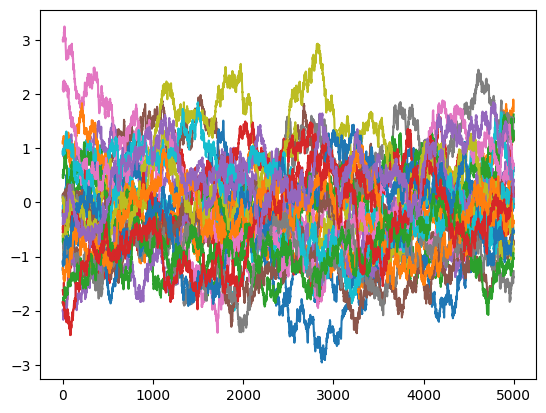

In [5]:
fig, axs = plt.subplots(1, 1)
for n, trj in enumerate(data):
    axs.plot(trj["x"])

There is also the possibility to run biased simulations for tests. Let's run adiabatic biased modelcular dynamics (ABMD) simulations. 

In [6]:
simulator = fl.simulations.ABMD_Simulator(stepper, 1e-3, k=10.0, xstop=6.0)
data_biased = simulator.run(5000, np.zeros((25,)), 25)

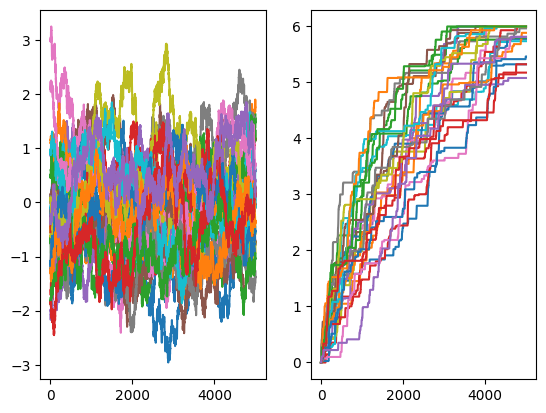

In [8]:
xmax = np.concatenate(simulator.xmax_hist, axis=1).T
fig, axs = plt.subplots(1, 2)
for n, trj in enumerate(data):
    axs[0].plot(trj["x"])
    axs[1].plot(xmax[:, n])